# NICO2AI  第2回 Python入門 (6/17) 実践演習

## 実践演習の進め方
1. 講師が題材及びコードの説明をします
2. "WRITE ME!"の部分のコードを書いてみましょう
3. 書き始める前に必要な処理の概略を頭の中やノートに浮かべてからコードに落とし込みましょう

## k-nn法の実装
1. まず簡単なアルゴリズムの説明をします
2. 次に与えられたデータを眺めてみましょう(実際のデータ分析でも，分析の前にデータを眺めておくことは重要です)
3. k-nn法を実装しましょう


### 1. データの観察

In [4]:
### おまじない
%matplotlib inline
### 必要なライブラリをインポート
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import cm

In [5]:
# データ取得
digits = datasets.load_digits()
# 入力データ
X = digits.data
# ラベルデータ
y = digits.target

In [23]:
#　データを色々観察してみましょう
X

In [24]:
y

In [25]:
## 学習データの枚数は？

## 一枚の画像のサイズは？

### 画像を可視化してみましょう 

In [26]:
# dataに画像を，labelにラベルを渡す
def visualize(data, label):
    if len(data) != len(label):
        print("画像とラベルの数が合いません")
        return
    
    num_data = len(data)
    size_window = np.ceil(np.sqrt(len(data)))
    
    samples = np.array(list(zip(data, label)))
    for index, (d, l) in enumerate(samples):
        # 画像データを格子状に配置する
        plt.subplot(size_window, size_window, index + 1)
        # 軸に関する表示はいらない
        plt.axis('off')
        # データを 8x8 のグレースケール画像として表示する
        plt.imshow(d.reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
        # 画像データのタイトルに正解ラベルを表示する
        plt.title(l, color='red')
        
    plt.show()

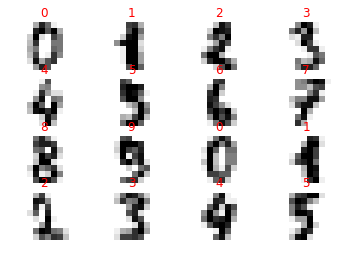

In [27]:
visualize(X[:16], y[:16])

## 2. k-nn法の実装 

まずコサイン類似度を計算する関数を書いていきましょう

In [28]:
# コサイン類似度
def cos_d(a, b):
    # write me

In [29]:
# 検算
a = np.array([0, 0, 1])
b = np.array([0, 0, 1])
cos_d(a, b) # => 1.0

In [30]:
c = np.array([1, 0])
d = np.array([0, 1])
cos_d(c, d) # => 0.0

次に，実際にk-nn法のコアのロジックを書いていきます．

画像データとラベルデータから成るデータセット内を用意します．

データセット内の全ての画像データに対して，評価対象の画像データとのコサイン類似度を計算します．

類似度の高かった上位k個の画像データに対応するラベルを，上位から順に出力しましょう．

In [16]:
#  Xはデータセットの画像 
#  yはデータセットのラベル
#　　target_Xは評価対象の画像(1枚)

In [31]:
def search(X, y, target_image):
    k = 7
    distances = np.zeros(len(X))
    for idx, im in enumerate(X):
        distances[idx] = # write me (コサイン類似度)
        
    # write me (距離を大きい順に並び替えて，そのidxを取得→対応するラベルを出力)
        
    return #ラベルのarray

In [32]:
# 検算
pred_labels = search2(X[:1700], y[:1700],  X[1702])
print(pred_labels)　# => [5 5 5 5 5 5 5]

In [18]:
# さらに必要なライブラリをインポート
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [20]:
def k_nn(train_X, train_y, test_X):
    rnd = np.random.RandomState(1701)
    # kの値を指定
    k = 7

    # データの分割
    train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, random_state=rnd)
    
    # モデルの評価
    pred_y = np.zeros(len(valid_X))
    for idx, im in enumerate(valid_X):
        # コサイン類似度の計算
        lbls = search(train_X, train_y, im) #　ここでsearch()を使う
        unique, counts = np.unique(lbls, return_counts=True)
        pred_y[idx] = unique[np.argmax(counts)]

    pred_y = pred_y.astype(int)
    # F値の計算
    score = f1_score(valid_y, pred_y, average='macro')
    print("Validation score: {}".format(score))
    
    
    # 評価対象のデータのラベルの推定
    pred_y = np.zeros(len(test_X))
    for idx, im in enumerate(test_X):
        lbls = search(train_X, train_y, im)
        unique, counts = np.unique(lbls, return_counts=True)
        pred_y[idx] = unique[np.argmax(counts)]

    pred_y = pred_y.astype(int)
    return pred_y

In [22]:
pred_y = k_nn(X[:1700], y[:1700], X[1700:1725])

In [ ]:
# 推定結果
visualize(X[1700:1725], pred_y)

In [ ]:
# 正解
visualize(X[1700:1725], y[1700:1725])

# 発展的な課題

1. 最適なkの値を探してみましょう
2. クロスバリデーションを行ってみましょう